In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from scipy.linalg import solve_triangular
import statsmodels.api as sm
from sklearn.decomposition import PCA
import plotly.express as px

# Parte 1: Carga y exploración de datos

In [2]:
datos = pd.read_csv("dataset_examen.csv")
filas,col = datos.shape
nulos = datos.isnull().sum()
print(f"El dataset tiene: {filas} filas y {col} columnas")
print("-------")
print(f"Valores nulos por columna: {nulos}" )
print("-------")
print(f"El tipo de dato de cada columna es: {datos.dtypes}")
print("-------")

El dataset tiene: 8000 filas y 41 columnas
-------
Valores nulos por columna: Variable 1     0
Variable 2     0
Variable 3     0
Variable 4     0
Variable 5     0
Variable 6     0
Variable 7     0
Variable 8     0
Variable 9     0
Variable 10    0
Variable 11    0
Variable 12    0
Variable 13    0
Variable 14    0
Variable 15    0
Variable 16    0
Variable 17    0
Variable 18    0
Variable 19    0
Variable 20    0
Variable 21    0
Variable 22    0
Variable 23    0
Variable 24    0
Variable 25    0
Variable 26    0
Variable 27    0
Variable 28    0
Variable 29    0
Variable 30    0
Variable 31    0
Variable 32    0
Variable 33    0
Variable 34    0
Variable 35    0
Variable 36    0
Variable 37    0
Variable 38    0
Variable 39    0
Variable 40    0
Out 1          0
dtype: int64
-------
El tipo de dato de cada columna es: Variable 1     float64
Variable 2     float64
Variable 3     float64
Variable 4     float64
Variable 5     float64
Variable 6     float64
Variable 7     float64
Variabl

In [3]:
datos.head()

,Variable 1,Variable 2,Variable 3,Variable 4,Variable 5,Variable 6,Variable 7,Variable 8,Variable 9,Variable 10,...,Variable 32,Variable 33,Variable 34,Variable 35,Variable 36,Variable 37,Variable 38,Variable 39,Variable 40,Out 1
0,4.914629,-2.572194,-1.533977,-4.145580,3.628521,2.008909,1.340625,-1.435813,-4.195808,6.526846,...,-4.058085,4.799544,-1.477260,0.735016,-1.688993,2.025324,-1.454839,-3.035142,-4.217200,-239.296650
1,5.863929,-0.948614,-2.362798,-0.983232,-1.385991,1.158402,0.543881,-1.627637,-2.841758,-2.484716,...,-0.091639,1.456378,-3.241445,-0.966565,1.701394,-1.282013,-1.396696,5.635389,1.109735,-388.541143
2,2.736850,0.014267,0.438549,2.919932,1.111580,4.095450,-0.156675,1.044744,-2.417208,-1.373226,...,3.135679,-0.177247,1.672540,-2.966058,-0.210928,1.935937,-4.786676,3.143651,-0.332317,-213.292209
3,4.321934,2.151625,0.282420,3.094397,-5.115398,-2.179215,0.023613,0.298043,4.180573,0.825231,...,-3.022405,1.983541,-1.406021,0.151140,-3.320931,4.608862,-4.579245,1.621717,-5.756642,13.557250
4,4.815051,0.683735,1.197724,-3.209236,-2.716783,-3.984121,3.041400,-2.701404,3.475824,3.665663,...,-1.078924,1.608684,-1.537553,3.351221,2.818093,-1.523819,-4.916427,2.443367,-0.118609,152.845451


In [5]:
datos = datos[['Variable 3','Variable 7','Variable 12','Variable 13','Variable 20','Variable 21','Variable 26','Variable 29','Variable 34','Variable 37', 'Out 1']]

In [6]:
print(datos.columns.to_list())

['Variable 3', 'Variable 7', 'Variable 12', 'Variable 13', 'Variable 20', 'Variable 21', 'Variable 26', 'Variable 29', 'Variable 34', 'Variable 37', 'Out 1']


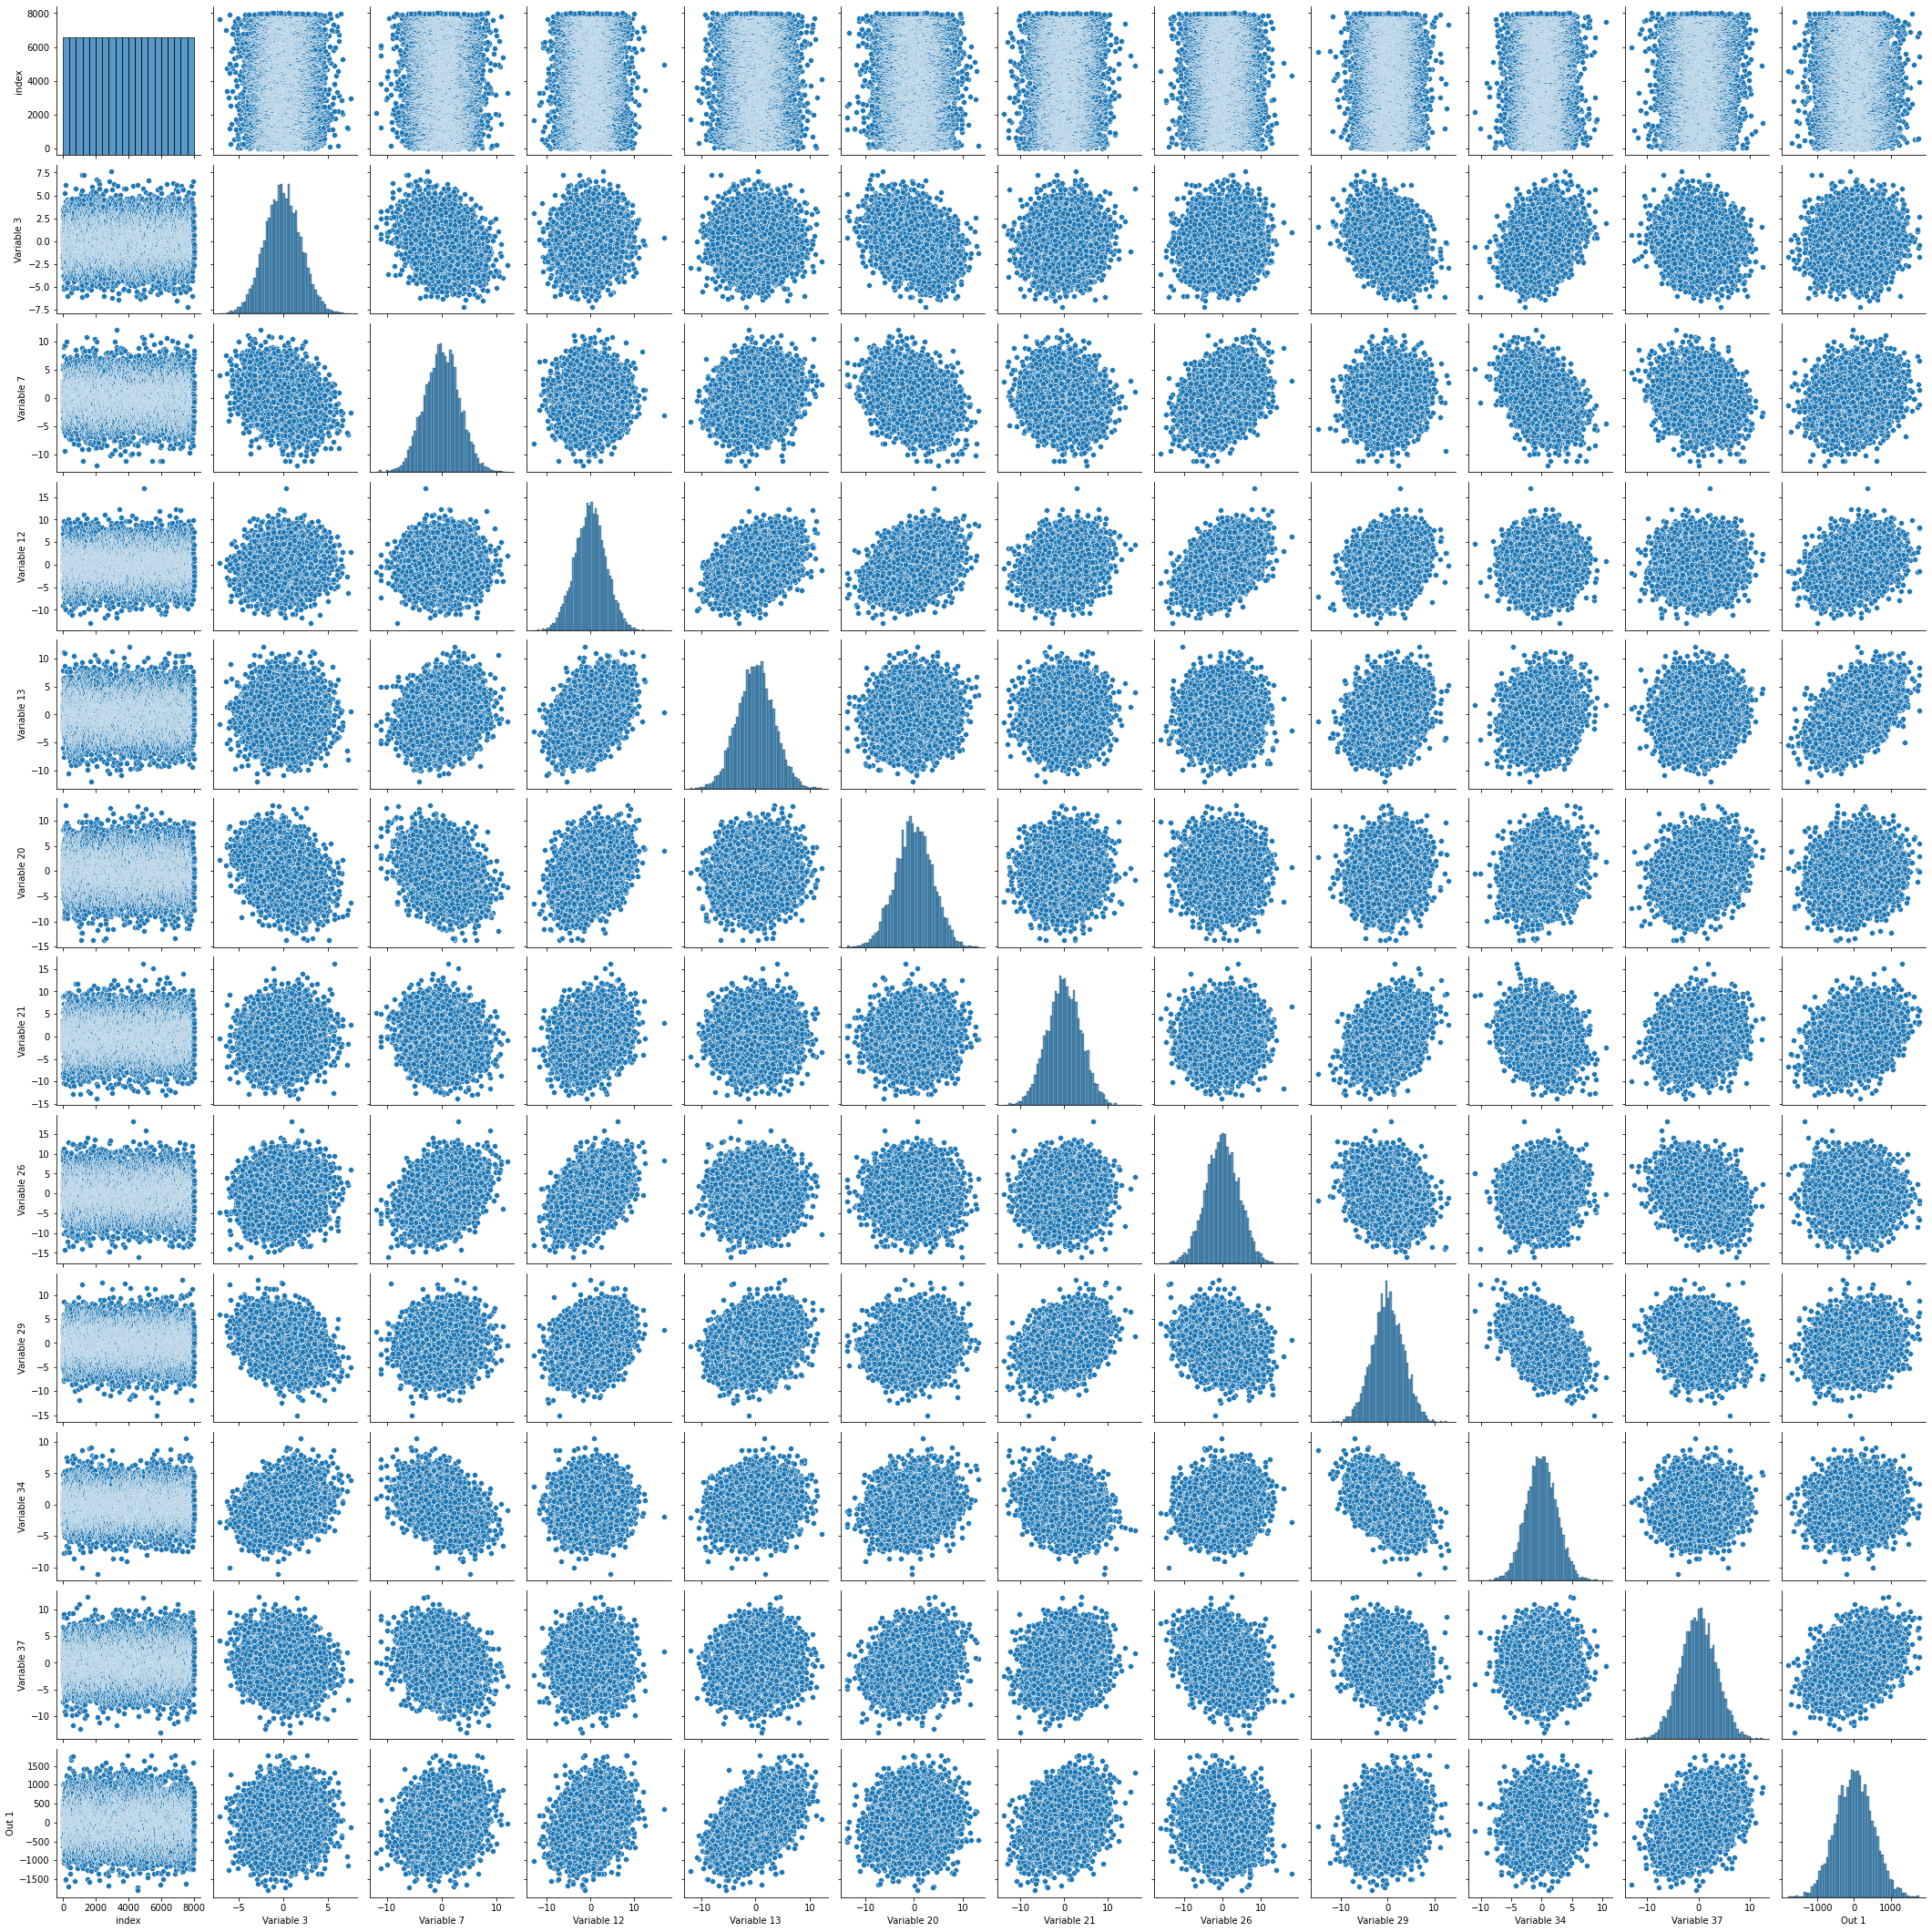

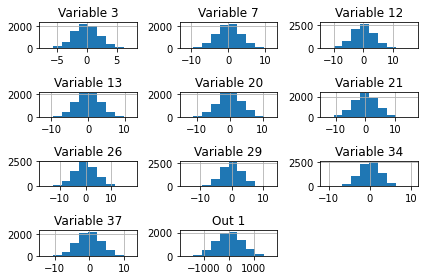

In [7]:
datos_indice = datos.reset_index()
sns.pairplot(datos_indice)
datos.hist()
plt.tight_layout()

# Parte 3: Regresión lineal múltiple con todas las variables

In [16]:
datos = datos[['Variable 3','Variable 7','Variable 12','Variable 13','Variable 20','Variable 21','Variable 26',
               'Variable 29','Variable 34','Variable 37', 'Out 1']]
X = datos.drop(columns=["Out 1"])
y = datos['Out 1']
X = X.values
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()


# Tabla con coeficientes y estadísticos
summary_df = pd.DataFrame({
    'Variable': ['Intercepto', '3', '7', '12', '13', '20', '21','26','29','34','37'],
    'Coeficiente': model.params,
    'Error estándar': model.bse,
    't-value': model.tvalues,
    'p-value': model.pvalues
})
print(summary_df)

# Mostrar en formato tabla interactiva
import plotly.figure_factory as ff
fig_table = ff.create_table(summary_df.round(9))
fig_table.update_layout(width=700)
fig_table.show()


         Variable  Coeficiente  Error estándar    t-value        p-value
const  Intercepto     6.141368        3.323403   1.847916   6.465149e-02
x1              3    86.180636        2.346526  36.726904  5.276996e-273
x2              7    97.724014        1.640794  59.558965   0.000000e+00
x3             12    -5.045573        1.520886  -3.317523   9.122510e-04
x4             13    32.781237        1.305956  25.101327  6.699987e-134
x5             20    21.115562        1.193415  17.693401   9.546816e-69
x6             21    36.365502        1.036089  35.098815  3.993557e-251
x7             26   -14.060736        1.240712 -11.332794   1.516460e-29
x8             29    45.671980        1.702835  26.821147  8.296979e-152
x9             34    79.037625        1.922638  41.108943   0.000000e+00
x10            37    77.977416        1.297839  60.082518   0.000000e+00


In [18]:
Errores = pd.DataFrame()
y_pred = model.predict(X_sm)
y_barra = np.mean(y)

TSS = np.sum((y - y_barra)**2)
RSS = np.sum((y-y_pred) **2)
RSE = np.sqrt(RSS / (len(datos)-(6+1)))
RMSE = np.sqrt(RSS/len(datos))
R2 = 1 - (RSS/TSS)
Metricas = {"TSS":TSS,"RSS" : RSS, "RSE": RSE, "RMSE": RMSE,"R2":R2}
Errores["Multivar"] = Metricas
print(Errores)

          Multivar
TSS   2.095878e+09
RSS   7.050295e+08
RSE   2.969947e+02
RMSE  2.968648e+02
R2    6.636114e-01


# Parte 4: Análisis de componentes principales (PCA)

In [23]:
X_nuev = datos.drop(columns=["Out 1"])
X_nuev = X_nuev - np.mean(X_nuev, axis=0)
print("\n=== PCA 6D ===")
pca_3d = PCA(n_components=6)
pca_3d.fit(X_nuev)
print("Autovalores (varianzas explicadas):", pca_3d.explained_variance_)
print("Autovectores (componentes principales):\n", pca_3d.components_)
print("Varianza explicada (%):", pca_3d.explained_variance_ratio_ * 100)




=== PCA 6D ===
Autovalores (varianzas explicadas): [26.83250393 24.2690564  18.90143009 14.14573122 11.64045832  9.7707845 ]
Autovectores (componentes principales):
 [[ 0.03311242  0.23991184  0.53562476  0.20251776  0.07794598  0.26935289
   0.70497387  0.10434491 -0.01477359 -0.16345558]
 [-0.07674346 -0.25613383  0.27571728  0.22095186  0.4550307   0.45082335
  -0.38594372  0.36722422 -0.0753138   0.32232465]
 [-0.07627642  0.37188679 -0.12013675  0.03557978 -0.47154274  0.23188788
  -0.22669243  0.52518029 -0.40646243 -0.2676627 ]
 [ 0.15561868 -0.26343412 -0.15469438 -0.53351891 -0.22976538  0.67187657
   0.18085406 -0.1960548  -0.06457887  0.1352263 ]
 [ 0.14309371  0.17648216  0.05503587  0.51780067 -0.48848539  0.11740149
  -0.07025646 -0.29766916  0.07623737  0.57050472]
 [-0.43425374  0.44903977 -0.11724639 -0.28948012  0.25446031 -0.09738079
   0.17090863 -0.06275185 -0.36754226  0.51939733]]
Varianza explicada (%): [22.97416547 20.77932492 16.18352815 12.11166765  9.966636

In [26]:

# Calcular la varianza explicada y la varianza acumulada
explained_var = pca_3d.explained_variance_ratio_
cum_var = np.cumsum(explained_var)
components = np.arange(1, len(explained_var)+1)

# Gráfico Plotly
fig_var = go.Figure()

# Varianza explicada por componente
fig_var.add_trace(go.Bar(
    x=components,
    y=explained_var,
    name='Varianza individual',
    marker_color='royalblue'
))

# Varianza acumulada
fig_var.add_trace(go.Scatter(
    x=components,
    y=cum_var,
    name='Varianza acumulada',
    mode='lines+markers',
    line=dict(color='firebrick', width=3),
    marker=dict(size=8)
))

fig_var.update_layout(
  title='Varianza explicada por componente y varianza acumulada',
  xaxis_title='Componente principal',
  yaxis_title='Fracción de varianza',
  yaxis=dict(range=[0,1.05]),
  legend=dict(x=0.7, y=0.75),
  width=800,
  height=400
)

fig_var.show()


In [27]:
for i, c in enumerate(pca_3d.components_):
  print('Componente principal',(i+1))
  for var, peso in zip(X_nuev.columns, c):
    print(var, ":", peso)
  print()


Componente principal 1
Variable 3 : 0.03311242393655306
Variable 7 : 0.23991183557684453
Variable 12 : 0.535624761362843
Variable 13 : 0.20251775500403266
Variable 20 : 0.0779459756161443
Variable 21 : 0.2693528931570808
Variable 26 : 0.7049738658138183
Variable 29 : 0.10434491150034618
Variable 34 : -0.014773592983274351
Variable 37 : -0.16345557562025045

Componente principal 2
Variable 3 : -0.07674345618092888
Variable 7 : -0.2561338336663618
Variable 12 : 0.27571727521227335
Variable 13 : 0.22095185902571288
Variable 20 : 0.4550307017124136
Variable 21 : 0.4508233507204258
Variable 26 : -0.3859437166849523
Variable 29 : 0.3672242240594005
Variable 34 : -0.07531379521486206
Variable 37 : 0.3223246458733909

Componente principal 3
Variable 3 : -0.07627642040503739
Variable 7 : 0.3718867880315629
Variable 12 : -0.12013675095973081
Variable 13 : 0.035579783903973004
Variable 20 : -0.4715427383651763
Variable 21 : 0.23188787552554427
Variable 26 : -0.22669242958251454
Variable 29 : 0.52

# Parte 5: Regresión con componentes principales


In [29]:
X_pca = pca_3d.transform(X_nuev)
X_sm_2 = sm.add_constant(X_pca[:, 0:4])

model = sm.OLS(y, X_sm_2).fit()

# Tabla con coeficientes y estadísticos
summary_df = pd.DataFrame({
    'Componente': ['Intercepto', 'Componente 1', 'Componente 2', 'Componente 3', 'Componente 4'],
    'Coeficiente': model.params,
    'Error estándar': model.bse,
    't-value': model.tvalues,
    'p-value': model.pvalues
})

# Mostrar en formato tabla interactiva
import plotly.figure_factory as ff
fig_table = ff.create_table(summary_df.round(4))
fig_table.update_layout(width=700)
fig_table.show()



In [31]:
Errores = pd.DataFrame()
y_pred = model.predict(X_sm_2)
Y_barra = np.mean(y)

TSS = np.sum((y - y_barra)**2)
RSS = np.sum((y-y_pred) **2)
RMSE = np.sqrt((1/len(datos)) * RSS)
R2 = 1 - (RSS/TSS)
Metricas = {"TSS":TSS,"RSS" : RSS,"RMSE": RMSE,"R2":R2}
Errores["4 componentes"] = Metricas
print(Errores)

      4 componentes
TSS    2.095878e+09
RSS    1.620404e+09
RMSE   4.500562e+02
R2     2.268613e-01


In [32]:
R2

0.2268612801380736

# Regresión polinomial con 1 variable

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x = datos["PapersPracticed"].values.reshape(-1,1)
y = datos["PerformanceIndex"].values

# ---- Regresiones ----
# Lineal
lin_reg = LinearRegression()
lin_reg.fit(x, y)
y_pred_lin = lin_reg.predict(x)
mse_lin = mean_squared_error(y, y_pred_lin)
print(f'MSE regresión lineal: {mse_lin:.4f}')

# Polinomial cuadrática
poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, y)
y_pred_poly2 = poly_reg2.predict(x_poly2)
mse_poly2 = mean_squared_error(y, y_pred_poly2)
print(f'MSE regresión cuadrática: {mse_poly2:.4f}')

# Polinomial grado 3
poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, y)
y_pred_poly3 = poly_reg3.predict(x_poly3)
mse_poly3 = mean_squared_error(y, y_pred_poly3)
print(f'MSE regresión grado 3: {mse_poly3:.4f}')

# Polinomial grado 4
poly4 = PolynomialFeatures(degree=4)
x_poly4 = poly4.fit_transform(x)
poly_reg4 = LinearRegression()
poly_reg4.fit(x_poly4, y)
y_pred_poly4 = poly_reg4.predict(x_poly4)
mse_poly4 = mean_squared_error(y, y_pred_poly4)
print(f'MSE regresión grado 4: {mse_poly4:.4f}')

# Polinomial grado 5
poly5 = PolynomialFeatures(degree=5)
x_poly5 = poly5.fit_transform(x)
poly_reg5 = LinearRegression()
poly_reg5.fit(x_poly5, y)
y_pred_poly5 = poly_reg5.predict(x_poly5)
mse_poly5 = mean_squared_error(y, y_pred_poly5)
print(f'MSE regresión grado 5: {mse_poly5:.4f}')

In [ ]:
def regression_summary(x, y, degree=1):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(x)
    X_sm = sm.add_constant(X_poly[:,1:])  # statsmodels agrega intercept
    model = sm.OLS(y, X_sm).fit()
    summary_df = pd.DataFrame({
        'Coeficiente': model.params,
        'Error estándar': model.bse,
        't-statistic': model.tvalues,
        'p-value': model.pvalues
    })
    return model, summary_df

In [ ]:
max_degree = 14 #número máximo de grado polinomial a considerar
if max_degree>10:
    max_degree = 10
    print('No se tiene soporte para más de 10 colores en este código')

models = {}
summaries = {}
for deg in range(1, max_degree+1):
    model, summary_df = regression_summary(x, y, degree=deg)
    models[deg] = model
    summaries[deg] = summary_df
    print(f'\n=== Resumen regresión grado {deg} ===')
    print(summary_df)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x.flatten(), y=y, mode='markers', name='Datos', marker=dict(color='black')))

# Paleta de 10 colores amigable para daltonismo
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for deg in range(1,max_degree+1):
    X_poly_plot = PolynomialFeatures(degree=deg).fit_transform(x)
    y_pred = models[deg].predict(sm.add_constant(X_poly_plot[:,1:]))
    fig.add_trace(go.Scatter(x=x.flatten(), y=y_pred, mode='lines', name=f'Grado {deg}', line=dict(color=colors[deg-1], width=3)))

fig.update_layout(title='Regresiones lineal y polinomial con tabla de coeficientes',
                  xaxis_title='Temperatura (°C)',
                  yaxis_title='Consumo eléctrico (MWh)',
                  legend=dict(x=0.7, y=0.95),
                  width=900,
                  height=700
                  )
fig.show()

# Regresión Polinomial con multiples variables

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# =============================
# Función para ajustar el modelo
# =============================
def ajustar_modelo(X, y, degree=1):
    # Generar términos polinomiales
    poly = PolynomialFeatures(degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Agregar intercepto para statsmodels
    X_sm = sm.add_constant(X_poly)

    # Ajustar el modelo
    model = sm.OLS(y, X_sm).fit()

    # Predicciones
    y_pred = model.predict(X_sm)

    # Métricas
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    return {"MSE": mse, "RMSE": rmse, "R2": r2}

# =============================
# Ejemplo de uso
# =============================

# Supongamos que "datos" es tu DataFrame
X = datos.drop(columns=["PerformanceIndex"]).values
y = datos["PerformanceIndex"].values

max_degree = 5  # No conviene más de 3 o 4 en multivariada, pero aquí puedes jugar
resultados = []

for deg in range(1, max_degree+1):
    metricas = ajustar_modelo(X, y, degree=deg)
    metricas["Grado"] = deg
    resultados.append(metricas)

# Pasamos a DataFrame para verlo bonito
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

# =============================
# Gráfica de desempeño
# =============================
plt.figure(figsize=(8,5))
plt.plot(df_resultados["Grado"], df_resultados["RMSE"], marker="o", label="RMSE")
plt.plot(df_resultados["Grado"], df_resultados["MSE"], marker="s", label="MSE")
plt.plot(df_resultados["Grado"], df_resultados["R2"], marker="^", label="R²")
plt.xlabel("Grado del polinomio")
plt.ylabel("Métrica")
plt.title("Desempeño del modelo según grado polinomial")
plt.legend()
plt.grid(True)
plt.show()
